# CNN (Convolutional Neural Network) : 합성곱 신경망

## MNIST 데이터셋

In [1]:
import tensorflow as tf

mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train/255., x_test/255.

x_train = x_train.reshape((60000, 28, 28, 1))
x_test = x_test.reshape((10000, 28, 28, 1))

## 신경망 구성

In [2]:
from tensorflow.keras import layers, models

model = models.Sequential([
    layers.Conv2D(32, kernel_size=(5,5), strides=(1,1), padding='same', activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPool2D(pool_size=(2,2), strides=(2,2)),
    layers.Conv2D(64, kernel_size=(2,2), strides=(1,1), padding='same', activation='relu'),
    layers.MaxPool2D(pool_size=(2,2), strides=(2,2)),
    layers.Dropout(0.25),
    layers.Flatten(),
    layers.Dense(1000, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [3]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        832       
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        8256      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 7, 7, 64)          0         
 g2D)                                                            
                                                                 
 dropout (Dropout)           (None, 7, 7, 64)          0         
                                                                 
 flatten (Flatten)           (None, 3136)              0

## 학습

In [4]:
import time

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

start_time = time.time()

hist = model.fit(x_train, y_train, epochs=5, verbose=1,
                 validation_data = (x_test, y_test))

print("Fit time : ", time.time() - start_time)

Epoch 1/5
1875/1875 [==============================] - 51s 27ms/step - loss: 0.1168 - accuracy: 0.9632 - val_loss: 0.0365 - val_accuracy: 0.9878
Epoch 2/5
1875/1875 [==============================] - 62s 33ms/step - loss: 0.0459 - accuracy: 0.9851 - val_loss: 0.0303 - val_accuracy: 0.9900
Epoch 3/5
1875/1875 [==============================] - 56s 30ms/step - loss: 0.0331 - accuracy: 0.9898 - val_loss: 0.0319 - val_accuracy: 0.9904
Epoch 4/5
1875/1875 [==============================] - 57s 30ms/step - loss: 0.0244 - accuracy: 0.9922 - val_loss: 0.0251 - val_accuracy: 0.9921
Epoch 5/5
1875/1875 [==============================] - 56s 30ms/step - loss: 0.0212 - accuracy: 0.9931 - val_loss: 0.0246 - val_accuracy: 0.9914
Fit time :  282.21370911598206


## accuracy, loss 시각화

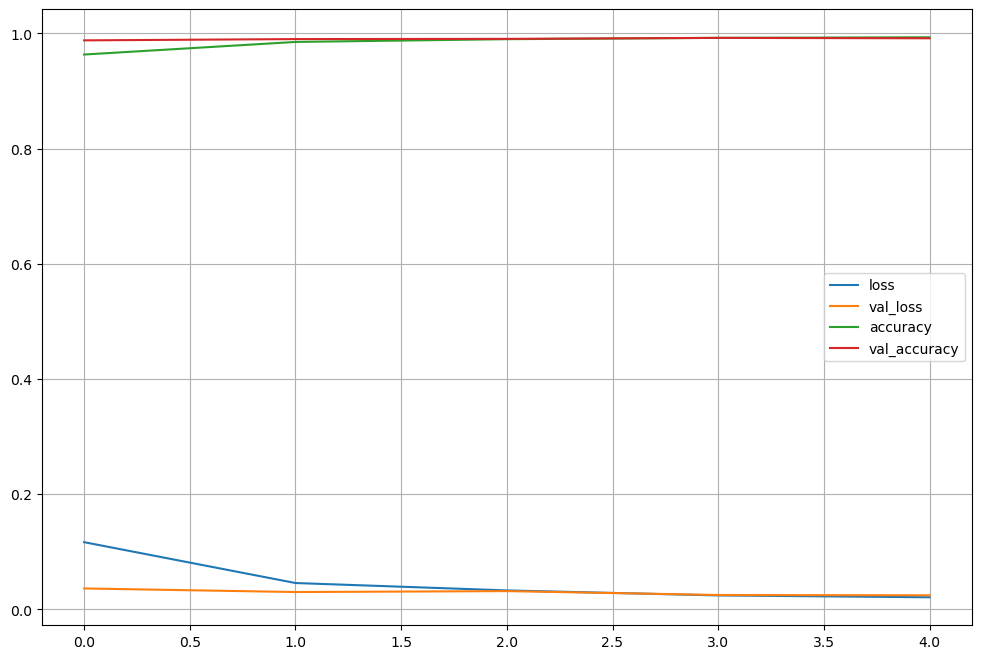

In [5]:
import matplotlib.pyplot as plt

plot_target = ['loss', 'val_loss', 'accuracy', 'val_accuracy']

plt.figure(figsize=(12, 8))

for each in plot_target :
    plt.plot(hist.history[each], label=each)

plt.legend()
plt.grid()
plt.show()

## 평가

In [6]:
score = model.evaluate(x_test, y_test)

print('Test loss : ', score[0])
print('Test accuracy : ', score[1])

313/313 [==============================] - 2s 5ms/step - loss: 0.0246 - accuracy: 0.9914
Test loss :  0.024607062339782715
Test accuracy :  0.9914000034332275


## 모델의 예측이 틀린 데이터 시각화

In [7]:
import numpy as np

# 모델이 예측한 확률값
predicted_result = model.predict(x_test)
# 모델이 예측한 label
predicted_labels = np.argmax(predicted_result, axis=1)

wrong_result = []

for n in range(0, len(y_test)) :
    if predicted_labels[n] != y_test[n] :
        wrong_result.append(wrong_result)

len(wrong_result)

313/313 [==============================] - 2s 7ms/step


86

## 모델 저장

In [17]:
model.save('./model/MNIST_CNN_model.h5')